# Cyclistic

Equipo de marketing para Cyclistic, se diseña una estrategia basado en los datos, para tomar decisiones estrategicas que ayuden a mejorar el rendimiento de la empresa. Las decisiones son basadas en los objetivos puntuales de la empresa, dichas decisiones son respaldadas por datos de calidad, un análisis y visualización profesional de los datos con los que se cuenta.

Para entender mejor los objetivos y metas. Cyclistic tiene en general dos tipos de clientes, ciclistas ocasinales y clientes anuales, el equipo financiaro comunicó que los ciclistas anuales son más rentables, entonces ¿Comó podemos atraer a los ciclistas ocasionales para que sean clientes anuales, cualés son las diferencias que existen entre ellos?


In [1]:
# Paquetes esenciales para R
install.packages("tydeverse")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tydeverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Instalar y cargar dplyr si no lo tienes
install.packages("dplyr")
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
install.packages("ggthemes")
library(ggthemes)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Uso de los librerias descargadas
library(tidyverse)
library(lubridate)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
install.packages("skimr")
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(dplyr)

In [8]:
# Cargamos el conjunto de datos con el que vamos a trabajar

df_cyclist <- read.csv("/content/202412-divvy-tripdata.csv")

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


In [9]:
head(df_cyclist)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6C960DEB4F78854E,electric_bike,2024-12-31 01:38:35.018,2024-12-31 01:48:45.775,Halsted St & Roscoe St,TA1309000025,Clark St & Winnemac Ave,TA1309000035,41.94363,-87.64908,41.97335,-87.66786,member
2,C0913EEB2834E7A2,classic_bike,2024-12-21 18:41:26.478,2024-12-21 18:47:33.871,Clark St & Wellington Ave,TA1307000136,Halsted St & Roscoe St,TA1309000025,41.93650,-87.64754,41.94363,-87.64908,member
3,848A37DD4723078A,classic_bike,2024-12-21 11:41:01.664,2024-12-21 11:52:45.094,Sheridan Rd & Montrose Ave,TA1307000107,Broadway & Barry Ave,13137,41.96167,-87.65464,41.93758,-87.64410,member
4,3FA09C762ECB48BD,electric_bike,2024-12-26 13:07:27.526,2024-12-26 13:10:54.130,Aberdeen St & Jackson Blvd,13157,Green St & Randolph St*,chargingstx3,41.87773,-87.65479,41.88360,-87.64863,member
5,E60317ADD1A87488,electric_bike,2024-12-13 15:17:55.063,2024-12-13 15:27:32.583,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member
6,A83DBA54802B4618,electric_bike,2024-12-08 03:24:46.718,2024-12-08 03:33:21.733,Ravenswood Ave & Lawrence Ave,TA1309000066,Kedzie Ave & Leland Ave,KA1504000126,41.96845,-87.67423,41.96669,-87.70805,member


In [10]:
# colnames nos brinda solo los nombres de las columnas
colnames(df_cyclist)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [11]:
# se muestra un resumen de los datos
glimpse(df_cyclist)

Rows: 48,083
Columns: 13
$ ride_id            <chr> "6C960DEB4F78854E", "C0913EEB2834E7A2", "848A37DD47…
$ rideable_type      <chr> "electric_bike", "classic_bike", "classic_bike", "e…
$ started_at         <chr> "2024-12-31 01:38:35.018", "2024-12-21 18:41:26.478…
$ ended_at           <chr> "2024-12-31 01:48:45.775", "2024-12-21 18:47:33.871…
$ start_station_name <chr> "Halsted St & Roscoe St", "Clark St & Wellington Av…
$ start_station_id   <chr> "TA1309000025", "TA1307000136", "TA1307000107", "13…
$ end_station_name   <chr> "Clark St & Winnemac Ave", "Halsted St & Roscoe St"…
$ end_station_id     <chr> "TA1309000035", "TA1309000025", "13137", "chargings…
$ start_lat          <dbl> 41.94363, 41.93650, 41.96167, 41.87773, 41.87306, 4…
$ start_lng          <dbl> -87.64908, -87.64754, -87.65464, -87.65479, -87.669…
$ end_lat            <dbl> 41.97335, 41.94363, 41.93758, 41.88360, 41.86662, 4…
$ end_lng            <dbl> -87.66786, -87.64908, -87.64410, -87.64863, -87.694…
$ member_casual

In [14]:
skim_without_charts(df_cyclist)

── Data Summary ────────────────────────
                           Values    
Name                       df_cyclist
Number of rows             48083     
Number of columns          13        
_______________________              
Column type frequency:               
  character                9         
  numeric                  4         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0             1  16  16     0    48083          0
2 rideable_type              0             1  12  13     0        2          0
3 started_at                 0             1  23  23     0    48081          0
4 ended_at                   0             1  23  23     0    48050          0
5 start_station_name         0             1   0  64  5501      834          0
6 start_station_id     

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 16' in coercion to 'logical(1)'


In [13]:
# cambia el nombre de todas las columnas a mayusculas en el df
rename_with(df_cyclist, toupper)
head()

RIDE_ID,RIDEABLE_TYPE,STARTED_AT,ENDED_AT,START_STATION_NAME,START_STATION_ID,END_STATION_NAME,END_STATION_ID,START_LAT,START_LNG,END_LAT,END_LNG,MEMBER_CASUAL
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6C960DEB4F78854E,electric_bike,2024-12-31 01:38:35.018,2024-12-31 01:48:45.775,Halsted St & Roscoe St,TA1309000025,Clark St & Winnemac Ave,TA1309000035,41.94363,-87.64908,41.97335,-87.66786,member
C0913EEB2834E7A2,classic_bike,2024-12-21 18:41:26.478,2024-12-21 18:47:33.871,Clark St & Wellington Ave,TA1307000136,Halsted St & Roscoe St,TA1309000025,41.93650,-87.64754,41.94363,-87.64908,member
848A37DD4723078A,classic_bike,2024-12-21 11:41:01.664,2024-12-21 11:52:45.094,Sheridan Rd & Montrose Ave,TA1307000107,Broadway & Barry Ave,13137,41.96167,-87.65464,41.93758,-87.64410,member
3FA09C762ECB48BD,electric_bike,2024-12-26 13:07:27.526,2024-12-26 13:10:54.130,Aberdeen St & Jackson Blvd,13157,Green St & Randolph St*,chargingstx3,41.87773,-87.65479,41.88360,-87.64863,member
E60317ADD1A87488,electric_bike,2024-12-13 15:17:55.063,2024-12-13 15:27:32.583,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member
A83DBA54802B4618,electric_bike,2024-12-08 03:24:46.718,2024-12-08 03:33:21.733,Ravenswood Ave & Lawrence Ave,TA1309000066,Kedzie Ave & Leland Ave,KA1504000126,41.96845,-87.67423,41.96669,-87.70805,member
D3D6DAF0AB53F245,electric_bike,2024-12-08 18:56:35.855,2024-12-08 19:04:09.295,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member
3309E4E902565E04,electric_bike,2024-12-09 16:26:13.301,2024-12-09 16:33:29.555,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member
805D6F3B51AD91AF,electric_bike,2024-12-19 16:30:17.751,2024-12-19 16:44:23.702,Paulina St & Flournoy St,KA1504000104,Michigan Ave & 18th St,13150,41.87306,-87.66913,41.85793,-87.62434,member


ERROR: Error in head.default(): argument "x" is missing, with no default


In [15]:
# cambiamos el nombre de las columnas

df_cyclist <- df_cyclist %>%
  dplyr::rename(
    ride_id = ride_id,
    bike_type = rideable_type,
    start_time = started_at,
    end_time = ended_at,
    start_station = start_station_name,
    start_station_id = start_station_id,
    end_station = end_station_name,
    end_station_id = end_station_id,
    start_lat = start_lat,
    start_lng = start_lng,
    end_lat = end_lat,
    end_lng = end_lng,
    user_type = member_casual
  )

In [16]:
 # Convertir las columnas de fecha y hora a formato datetime
df_cyclist <- df_cyclist %>%
  mutate(
    start_time = ymd_hms(start_time),
    end_time = ymd_hms(end_time)
  )

In [17]:
# Mostramos el nuevo df
head(df_cyclist)

,ride_id,bike_type,start_time,end_time,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6C960DEB4F78854E,electric_bike,2024-12-31 01:38:35,2024-12-31 01:48:45,Halsted St & Roscoe St,TA1309000025,Clark St & Winnemac Ave,TA1309000035,41.94363,-87.64908,41.97335,-87.66786,member
2,C0913EEB2834E7A2,classic_bike,2024-12-21 18:41:26,2024-12-21 18:47:33,Clark St & Wellington Ave,TA1307000136,Halsted St & Roscoe St,TA1309000025,41.93650,-87.64754,41.94363,-87.64908,member
3,848A37DD4723078A,classic_bike,2024-12-21 11:41:01,2024-12-21 11:52:45,Sheridan Rd & Montrose Ave,TA1307000107,Broadway & Barry Ave,13137,41.96167,-87.65464,41.93758,-87.64410,member
4,3FA09C762ECB48BD,electric_bike,2024-12-26 13:07:27,2024-12-26 13:10:54,Aberdeen St & Jackson Blvd,13157,Green St & Randolph St*,chargingstx3,41.87773,-87.65479,41.88360,-87.64863,member
5,E60317ADD1A87488,electric_bike,2024-12-13 15:17:55,2024-12-13 15:27:32,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member
6,A83DBA54802B4618,electric_bike,2024-12-08 03:24:46,2024-12-08 03:33:21,Ravenswood Ave & Lawrence Ave,TA1309000066,Kedzie Ave & Leland Ave,KA1504000126,41.96845,-87.67423,41.96669,-87.70805,member


In [19]:
# Nuevamnente se muestra el resuemen ahora con formato de fecha
skim_without_charts(df_cyclist)

── Data Summary ────────────────────────
                           Values    
Name                       df_cyclist
Number of rows             48083     
Number of columns          13        
_______________________              
Column type frequency:               
  character                7         
  numeric                  4         
  POSIXct                  2         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate min max empty n_unique whitespace
1 ride_id                  0             1  16  16     0    48083          0
2 bike_type                0             1  12  13     0        2          0
3 start_station            0             1   0  64  5501      834          0
4 start_station_id         0             1   0  13  5501      835          0
5 end_station              0             1   4  64     0      370         

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 20' in coercion to 'logical(1)'


In [20]:
# Crear una nueva columna: duración del viaje en minutos
df_cyclist <- df_cyclist %>%
  mutate(trip_duration = as.numeric(difftime(end_time, start_time, units = "mins")))


In [21]:
head(df_cyclist)

,ride_id,bike_type,start_time,end_time,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,trip_duration
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,6C960DEB4F78854E,electric_bike,2024-12-31 01:38:35,2024-12-31 01:48:45,Halsted St & Roscoe St,TA1309000025,Clark St & Winnemac Ave,TA1309000035,41.94363,-87.64908,41.97335,-87.66786,member,10.179283
2,C0913EEB2834E7A2,classic_bike,2024-12-21 18:41:26,2024-12-21 18:47:33,Clark St & Wellington Ave,TA1307000136,Halsted St & Roscoe St,TA1309000025,41.93650,-87.64754,41.94363,-87.64908,member,6.123217
3,848A37DD4723078A,classic_bike,2024-12-21 11:41:01,2024-12-21 11:52:45,Sheridan Rd & Montrose Ave,TA1307000107,Broadway & Barry Ave,13137,41.96167,-87.65464,41.93758,-87.64410,member,11.723833
4,3FA09C762ECB48BD,electric_bike,2024-12-26 13:07:27,2024-12-26 13:10:54,Aberdeen St & Jackson Blvd,13157,Green St & Randolph St*,chargingstx3,41.87773,-87.65479,41.88360,-87.64863,member,3.443400
5,E60317ADD1A87488,electric_bike,2024-12-13 15:17:55,2024-12-13 15:27:32,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member,9.625333
6,A83DBA54802B4618,electric_bike,2024-12-08 03:24:46,2024-12-08 03:33:21,Ravenswood Ave & Lawrence Ave,TA1309000066,Kedzie Ave & Leland Ave,KA1504000126,41.96845,-87.67423,41.96669,-87.70805,member,8.583583


In [22]:
# Eliminar filas con duraciones negativas o nulas
df_cyclist <- df_cyclist %>%
  filter(trip_duration > 0)


In [23]:
# Crear columnas adicionales: día de la semana y hora del día
df_cyclist <- df_cyclist %>%
  mutate(
    day_of_week = wday(start_time, label = TRUE, abbr = FALSE),
    hour_of_day = hour(start_time)
  )


In [24]:
head(df_cyclist)

,ride_id,bike_type,start_time,end_time,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,trip_duration,day_of_week,hour_of_day
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<int>
1,6C960DEB4F78854E,electric_bike,2024-12-31 01:38:35,2024-12-31 01:48:45,Halsted St & Roscoe St,TA1309000025,Clark St & Winnemac Ave,TA1309000035,41.94363,-87.64908,41.97335,-87.66786,member,10.179283,Tuesday,1
2,C0913EEB2834E7A2,classic_bike,2024-12-21 18:41:26,2024-12-21 18:47:33,Clark St & Wellington Ave,TA1307000136,Halsted St & Roscoe St,TA1309000025,41.93650,-87.64754,41.94363,-87.64908,member,6.123217,Saturday,18
3,848A37DD4723078A,classic_bike,2024-12-21 11:41:01,2024-12-21 11:52:45,Sheridan Rd & Montrose Ave,TA1307000107,Broadway & Barry Ave,13137,41.96167,-87.65464,41.93758,-87.64410,member,11.723833,Saturday,11
4,3FA09C762ECB48BD,electric_bike,2024-12-26 13:07:27,2024-12-26 13:10:54,Aberdeen St & Jackson Blvd,13157,Green St & Randolph St*,chargingstx3,41.87773,-87.65479,41.88360,-87.64863,member,3.443400,Thursday,13
5,E60317ADD1A87488,electric_bike,2024-12-13 15:17:55,2024-12-13 15:27:32,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member,9.625333,Friday,15
6,A83DBA54802B4618,electric_bike,2024-12-08 03:24:46,2024-12-08 03:33:21,Ravenswood Ave & Lawrence Ave,TA1309000066,Kedzie Ave & Leland Ave,KA1504000126,41.96845,-87.67423,41.96669,-87.70805,member,8.583583,Sunday,3


In [25]:
# Identificar y eliminar valores faltantes en columnas críticas (estaciones y coordenadas)
df_cyclist <- df_cyclist %>%
  filter(!is.na(start_station) & !is.na(end_station) & !is.na(start_lat) & !is.na(end_lat))

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


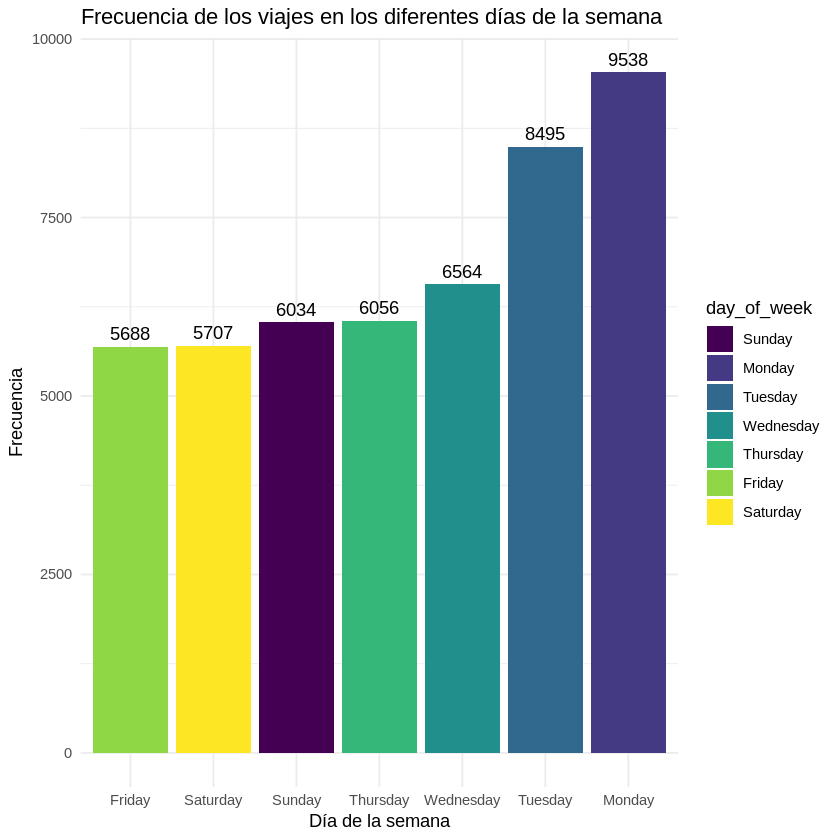

In [26]:
# Frecuencia de uso por día de la semana
ggplot(df_cyclist, aes(x = reorder(day_of_week, day_of_week, FUN = length), fill = day_of_week)) +
  geom_bar() +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +  # Agregar etiquetas con frecuencias
  labs(title = "Frecuencia de los viajes en los diferentes días de la semana", x = "Día de la semana", y = "Frecuencia") +
  theme_minimal()

In [27]:
# Vista de los datos limpios
summary(df_cyclist)

   ride_id           bike_type           start_time                    
 Length:48082       Length:48082       Min.   :2024-11-30 18:02:21.96  
 Class :character   Class :character   1st Qu.:2024-12-07 17:14:37.24  
 Mode  :character   Mode  :character   Median :2024-12-13 13:06:45.95  
                                       Mean   :2024-12-14 14:17:40.79  
                                       3rd Qu.:2024-12-20 10:00:33.48  
                                       Max.   :2024-12-31 23:54:37.03  
                                                                       
    end_time                      start_station      start_station_id  
 Min.   :2024-12-01 00:00:41.76   Length:48082       Length:48082      
 1st Qu.:2024-12-07 17:23:57.77   Class :character   Class :character  
 Median :2024-12-13 13:16:47.41   Mode  :character   Mode  :character  
 Mean   :2024-12-14 14:28:57.24                                        
 3rd Qu.:2024-12-20 10:07:21.66                                 

In [28]:
# Visualización preliminar: Duración promedio de viaje por tipo de usuario
avg_trip_duration <- df_cyclist %>%
  group_by(user_type) %>%
  summarise(avg_duration = mean(trip_duration))

In [29]:
View(avg_trip_duration)

user_type,avg_duration
<chr>,<dbl>
casual,14.25968
member,10.48285


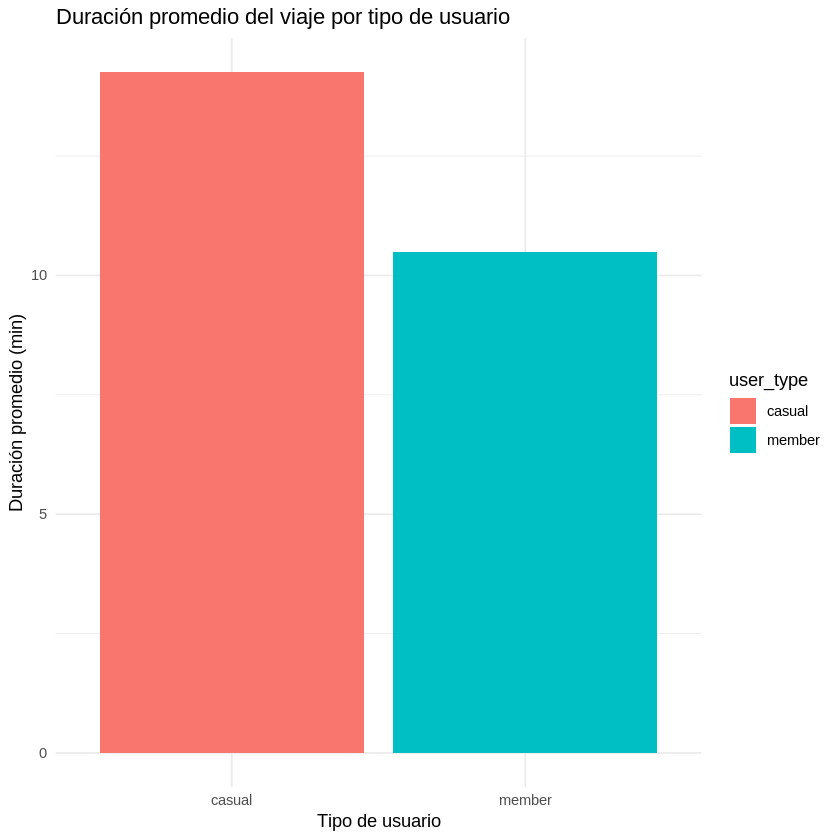

In [30]:
ggplot(avg_trip_duration, aes(x = user_type, y = avg_duration, fill = user_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Duración promedio del viaje por tipo de usuario",
       x = "Tipo de usuario",
       y = "Duración promedio (min)") +
  theme_minimal()

In [31]:
# Crear una nueva columna con el mes de inicio del viaje
df_cyclist_mes <- df_cyclist %>%
  mutate(month = month(start_time, label = TRUE, abbr = FALSE))  # Extrae el mes con nombres completos


In [32]:
# Se muestra la nueva columnda con el Mes
head(df_cyclist_mes)

,ride_id,bike_type,start_time,end_time,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,trip_duration,day_of_week,hour_of_day,month
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<int>,<ord>
1,6C960DEB4F78854E,electric_bike,2024-12-31 01:38:35,2024-12-31 01:48:45,Halsted St & Roscoe St,TA1309000025,Clark St & Winnemac Ave,TA1309000035,41.94363,-87.64908,41.97335,-87.66786,member,10.179283,Tuesday,1,December
2,C0913EEB2834E7A2,classic_bike,2024-12-21 18:41:26,2024-12-21 18:47:33,Clark St & Wellington Ave,TA1307000136,Halsted St & Roscoe St,TA1309000025,41.93650,-87.64754,41.94363,-87.64908,member,6.123217,Saturday,18,December
3,848A37DD4723078A,classic_bike,2024-12-21 11:41:01,2024-12-21 11:52:45,Sheridan Rd & Montrose Ave,TA1307000107,Broadway & Barry Ave,13137,41.96167,-87.65464,41.93758,-87.64410,member,11.723833,Saturday,11,December
4,3FA09C762ECB48BD,electric_bike,2024-12-26 13:07:27,2024-12-26 13:10:54,Aberdeen St & Jackson Blvd,13157,Green St & Randolph St*,chargingstx3,41.87773,-87.65479,41.88360,-87.64863,member,3.443400,Thursday,13,December
5,E60317ADD1A87488,electric_bike,2024-12-13 15:17:55,2024-12-13 15:27:32,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member,9.625333,Friday,15,December
6,A83DBA54802B4618,electric_bike,2024-12-08 03:24:46,2024-12-08 03:33:21,Ravenswood Ave & Lawrence Ave,TA1309000066,Kedzie Ave & Leland Ave,KA1504000126,41.96845,-87.67423,41.96669,-87.70805,member,8.583583,Sunday,3,December


In [35]:
# Agrupar por mes y contar el número de viajes
trips_per_month <- df_cyclist_mes %>%
  group_by(month) %>%
  summarise(total_trips = n()) %>%
  arrange(desc(total_trips))  # Ordenar de mayor a menor número de viajes

In [36]:
head(trips_per_month)

month,total_trips
<ord>,<int>
December,48079
November,3


In [37]:
summary(trips_per_month)

      month    total_trips   
 November:1   Min.   :    3  
 December:1   1st Qu.:12022  
 January :0   Median :24041  
 February:0   Mean   :24041  
 March   :0   3rd Qu.:36060  
 April   :0   Max.   :48079  
 (Other) :0                  

In [39]:
glimpse(df_cyclist)

Rows: 48,082
Columns: 16
$ ride_id          <chr> "6C960DEB4F78854E", "C0913EEB2834E7A2", "848A37DD4723…
$ bike_type        <chr> "electric_bike", "classic_bike", "classic_bike", "ele…
$ start_time       <dttm> 2024-12-31 01:38:35, 2024-12-21 18:41:26, 2024-12-21…
$ end_time         <dttm> 2024-12-31 01:48:45, 2024-12-21 18:47:33, 2024-12-21…
$ start_station    <chr> "Halsted St & Roscoe St", "Clark St & Wellington Ave"…
$ start_station_id <chr> "TA1309000025", "TA1307000136", "TA1307000107", "1315…
$ end_station      <chr> "Clark St & Winnemac Ave", "Halsted St & Roscoe St", …
$ end_station_id   <chr> "TA1309000035", "TA1309000025", "13137", "chargingstx…
$ start_lat        <dbl> 41.94363, 41.93650, 41.96167, 41.87773, 41.87306, 41.…
$ start_lng        <dbl> -87.64908, -87.64754, -87.65464, -87.65479, -87.66913…
$ end_lat          <dbl> 41.97335, 41.94363, 41.93758, 41.88360, 41.86662, 41.…
$ end_lng          <dbl> -87.66786, -87.64908, -87.64410, -87.64863, -87.69452…
$ user_type    

Calculamos algunos datos estadisticos

In [40]:
# Calcular la media de
mean_trip <- mean(df_cyclist$trip_duration, na.rm = TRUE)

# Calcular el máximo de ride_length
max_trip <- max(df_cyclist$trip_duration, na.rm = TRUE)

# Calcular la moda de day_of_week
calculate_mode <- function(x) {
  uniq <- unique(x)
  uniq[which.max(tabulate(match(x, uniq)))]
}
mode_day_of_week <- calculate_mode(df_cyclist$day_of_week)

In [42]:
print(mean_trip)

[1] 11.27401


In [44]:
max_trip

[1] 1383.749

In [45]:
mode_day_of_week

[1] Monday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

In [46]:
# Ordenar de mayor a menor por la columna trip_duration
data_sorted <- df_cyclist %>%
  arrange(desc(trip_duration))

# Mostrar los primeros registros ordenados
head(data_sorted)


,ride_id,bike_type,start_time,end_time,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,trip_duration,day_of_week,hour_of_day
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<int>
1,BB1BF1BEA150143A,classic_bike,2024-12-30 22:31:20,2024-12-31 21:35:05,Kingsbury St & Kinzie St,KA1503000043,Carpenter St & Huron St,13196,41.88918,-87.63851,41.89456,-87.65345,casual,1383.7488,Monday,22
2,53691D0EE3EC99AF,classic_bike,2024-12-27 10:56:01,2024-12-28 09:30:35,Sheffield Ave & Wellington Ave,TA1307000052,Lincoln Ave & Melrose St,TA1309000042,41.93625,-87.65266,41.94060,-87.66943,casual,1354.5605,Friday,10
3,6192260920AE1A07,classic_bike,2024-12-16 14:59:11,2024-12-17 12:32:40,State St & Randolph St,TA1305000029,Michigan Ave & Washington St,13001,41.88462,-87.62783,41.88398,-87.62468,casual,1293.4836,Monday,14
4,DC3D44EBA17F8AEF,classic_bike,2024-12-02 12:39:00,2024-12-03 08:23:50,Damen Ave & Pierce Ave,TA1305000041,Clark St & Schreiber Ave,KA1504000156,41.90882,-87.67719,41.99925,-87.67125,member,1184.8262,Monday,12
5,E7BAA890D2CF2E74,classic_bike,2024-12-07 20:10:11,2024-12-08 14:17:33,DuSable Lake Shore Dr & Monroe St,13300,DuSable Lake Shore Dr & Monroe St,13300,41.88096,-87.61674,41.88096,-87.61674,casual,1087.3631,Saturday,20
6,79816AA503E05DDB,classic_bike,2024-12-26 18:40:15,2024-12-27 11:00:06,Wells St & Concord Ln,TA1308000050,New St & Illinois St,TA1306000013,41.91213,-87.63466,41.89085,-87.61862,casual,979.8452,Thursday,18


Debido a que como observamos un valor atípico en la duración de los viajes, esto tiene varias consecuencias esto puede ser debido a si representammos este valor en hora signica 1383.74min equivale a 23h 3min que puede resultar en un viaje extraordinario y que es es verdadero, pero por otro lado también puede ser que exista algún problema en el momento de devolver la bicicleta a la estación, o que haya habido un error en el sistema, para sondear un poco más sobre este valor, exploramos si existen más valores como esté o si se trata de una caso único (outliner), usamos algunas visualización de los datos para conocer más información.

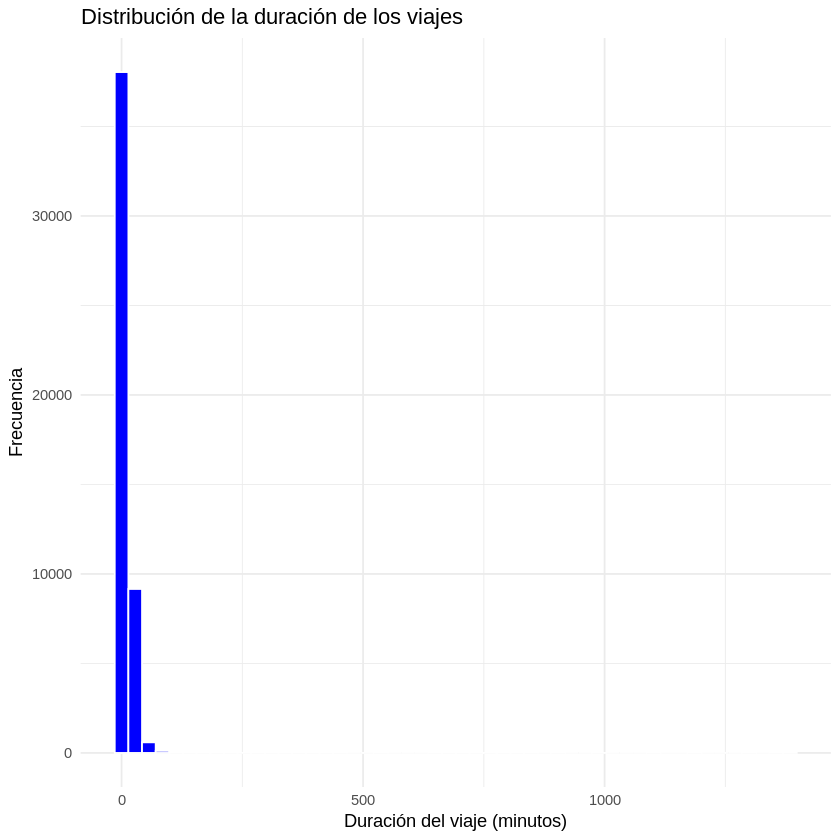

In [49]:
ggplot(df_cyclist, aes(x = trip_duration)) +
  geom_histogram(bins = 50, fill = "blue", color = "white") +
  labs(title = "Distribución de la duración de los viajes",
       x = "Duración del viaje (minutos)",
       y = "Frecuencia") +
  theme_minimal()


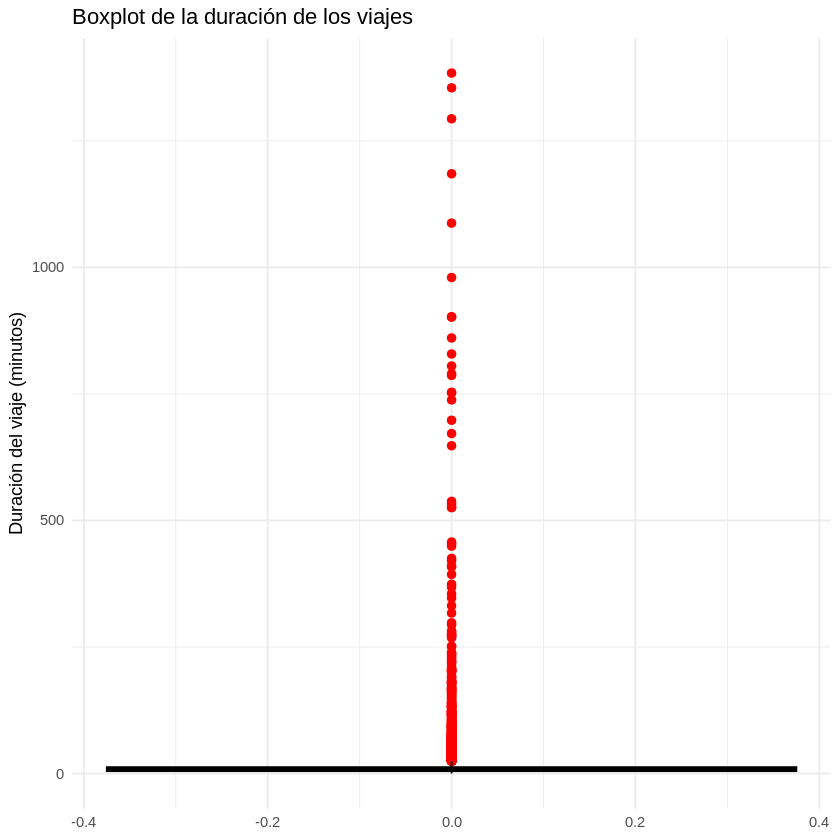

In [50]:
ggplot(df_cyclist, aes(y = trip_duration)) +
  geom_boxplot(fill = "orange", color = "black", outlier.color = "red", outlier.size = 2) +
  labs(title = "Boxplot de la duración de los viajes",
       y = "Duración del viaje (minutos)") +
  theme_minimal()


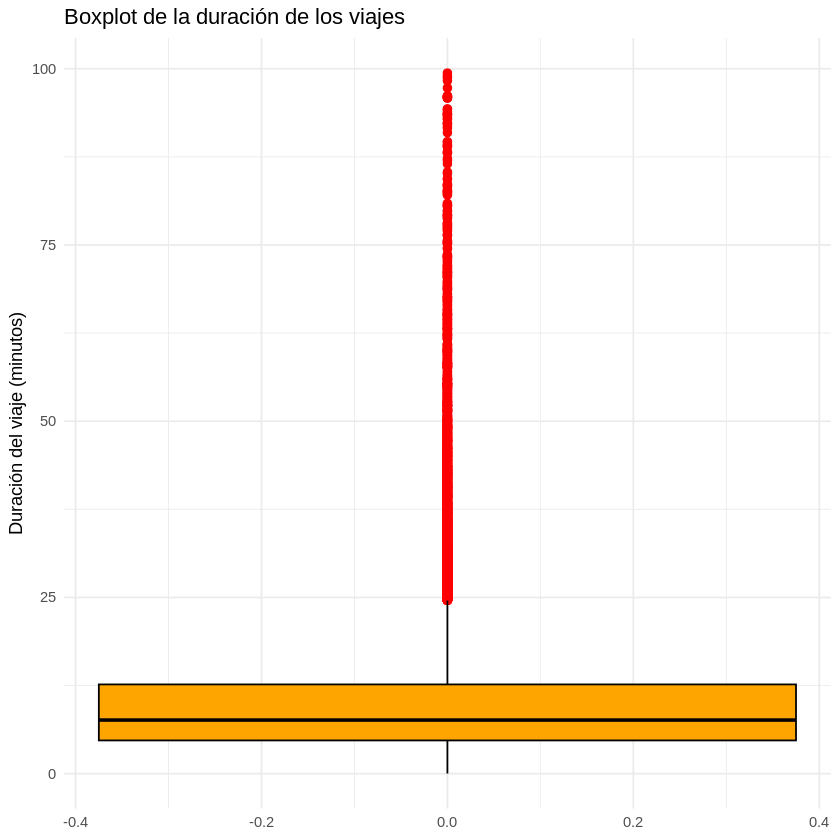

In [57]:
ggplot(df_cyclist %>% filter(trip_duration < 100), aes(y = trip_duration)) +
  geom_boxplot(fill = "orange", color = "black", outlier.color = "red", outlier.size = 2) +
  labs(title = "Boxplot de la duración de los viajes",
       y = "Duración del viaje (minutos)") +
  theme_minimal()


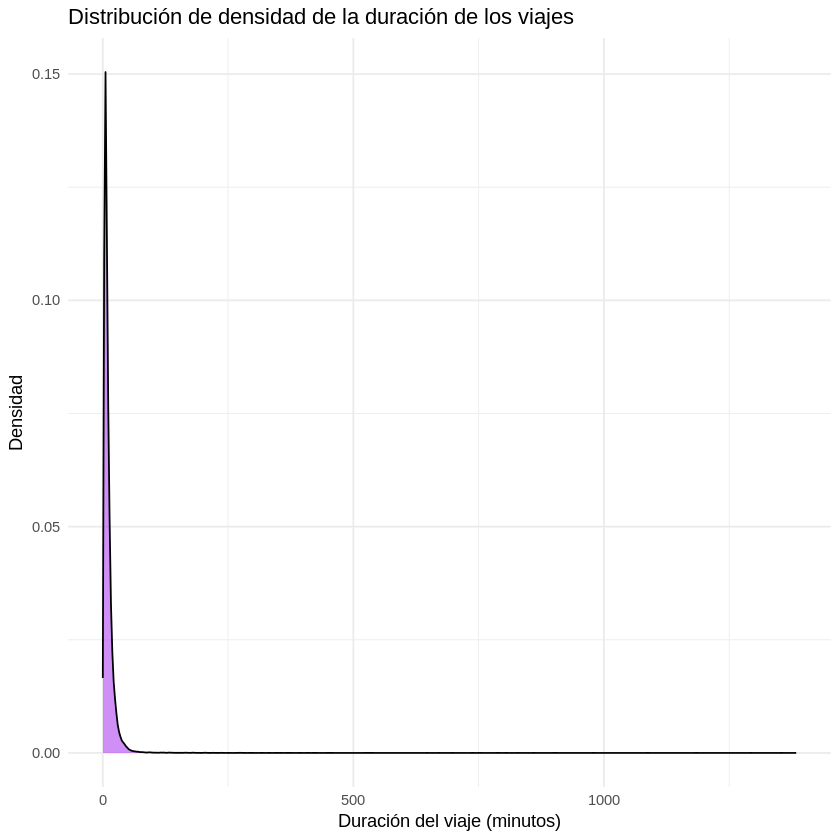

In [51]:
ggplot(df_cyclist, aes(x = trip_duration)) +
  geom_density(fill = "purple", alpha = 0.5) +
  labs(title = "Distribución de densidad de la duración de los viajes",
       x = "Duración del viaje (minutos)",
       y = "Densidad") +
  theme_minimal()


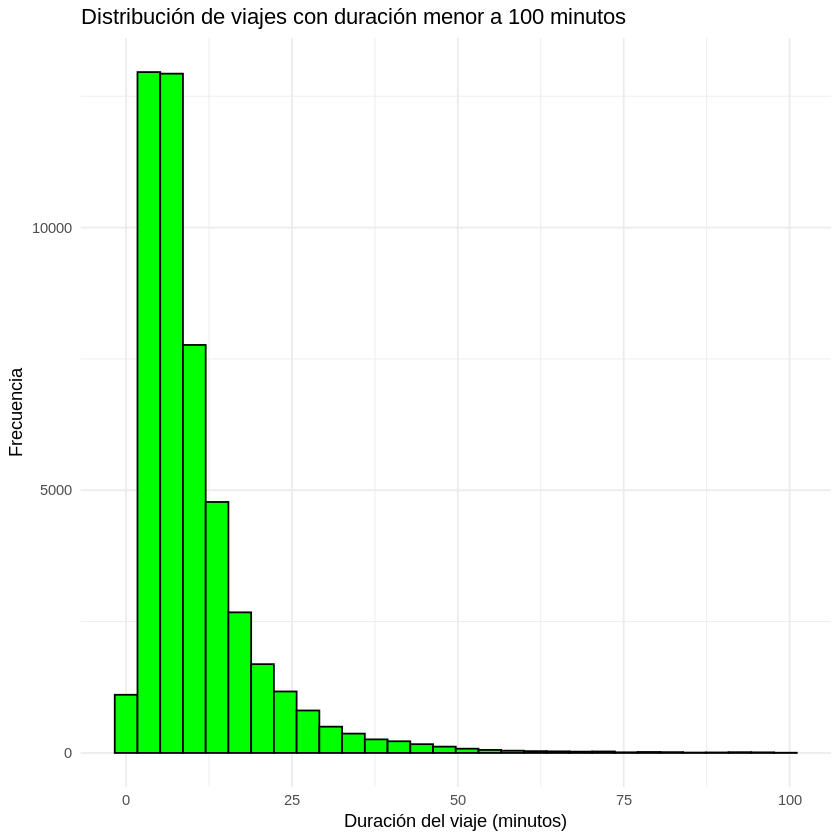

In [52]:
ggplot(df_cyclist %>% filter(trip_duration < 100), aes(x = trip_duration)) +
  geom_histogram(bins = 30, fill = "green", color = "black") +
  labs(title = "Distribución de viajes con duración menor a 100 minutos",
       x = "Duración del viaje (minutos)",
       y = "Frecuencia") +
  theme_minimal()


# Normalizar

vamos a normalizar los datos para obtener una mejor grafica

In [58]:
df_log <- df_cyclist %>%
  mutate(trip_duration_log = log1p(trip_duration))


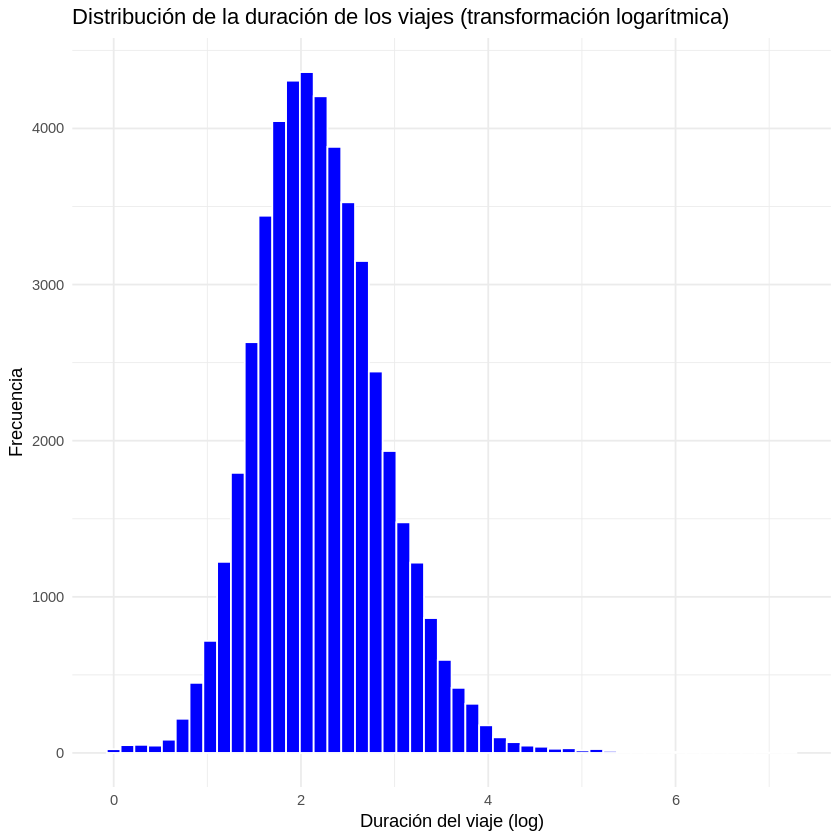

In [59]:
ggplot(df_log, aes(x = trip_duration_log)) +
  geom_histogram(bins = 50, fill = "blue", color = "white") +
  labs(title = "Distribución de la duración de los viajes (transformación logarítmica)",
       x = "Duración del viaje (log)",
       y = "Frecuencia") +
  theme_minimal()


In [61]:
summary(df_cyclist$trip_duration)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.0165    4.7233    7.6339   11.2740   12.7409 1383.7488 

# Filtrar valores atípicos usando el rango intercuartil (IQR)

In [62]:
Q1 <- quantile(df_cyclist$trip_duration, 0.25)
Q3 <- quantile(df_cyclist$trip_duration, 0.75)
IQR <- Q3 - Q1

# Definir umbrales para detectar outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Filtrar datos dentro de los límites normales
data_filtered <- df_cyclist %>% filter(trip_duration >= lower_bound & trip_duration <= upper_bound)

# Revisar el resumen de los datos limpios
summary(data_filtered$trip_duration)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0165  4.5404  7.1705  8.4959 11.3779 24.7642 

In [64]:
df_cyclist %>%
  group_by(user_type) %>%
  summarise(avg_ride_length = mean(trip_duration, na.rm = TRUE))


user_type,avg_ride_length
<chr>,<dbl>
casual,14.25968
member,10.48285


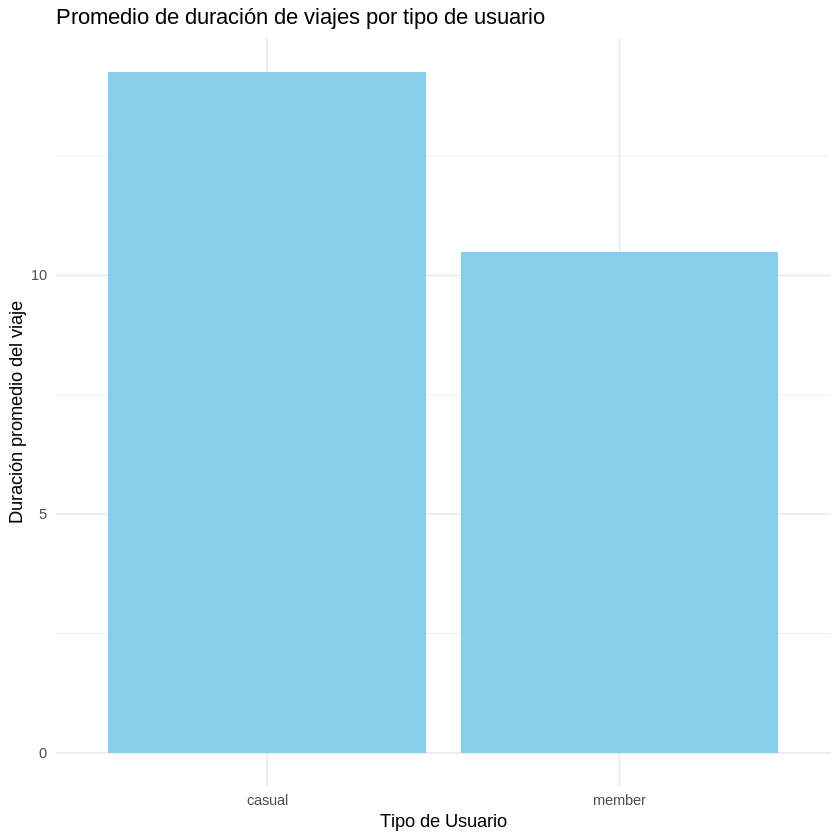

In [76]:
df_cyclist %>%
  group_by(user_type) %>%
  summarise(avg_ride_length = mean(trip_duration, na.rm = TRUE)) %>%
  ggplot(aes(x = user_type, y = avg_ride_length)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(title = "Promedio de duración de viajes por tipo de usuario",
       x = "Tipo de Usuario", y = "Duración promedio del viaje")

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


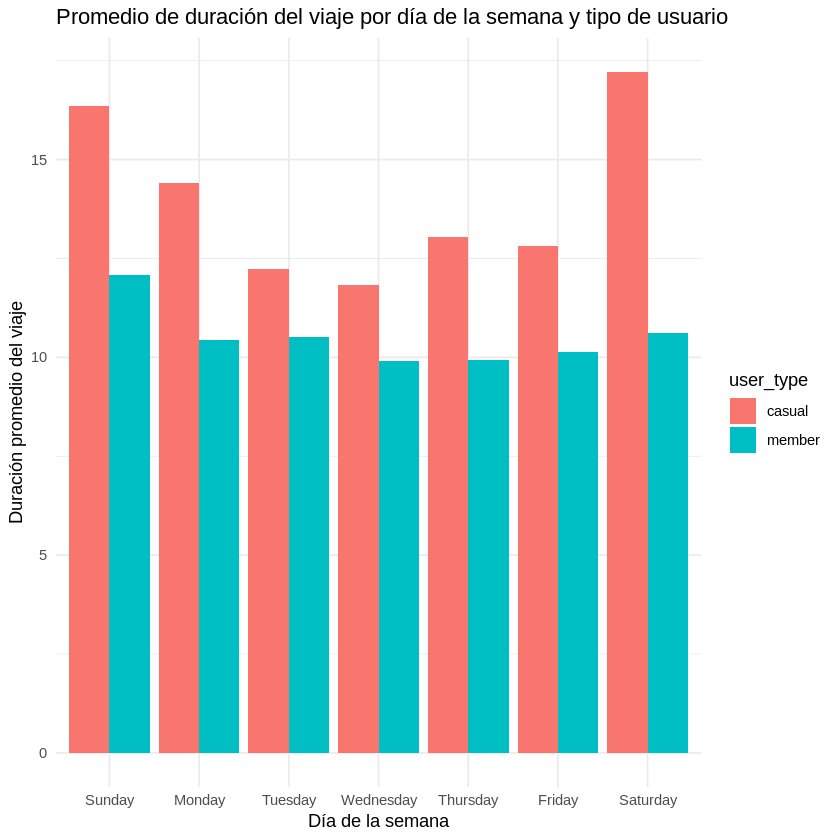

In [69]:
df_cyclist %>%
  group_by(day_of_week, user_type) %>%  # Agregar la columna "user_type" para calcular por tipo de usuario
  summarise(avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  ggplot(aes(x = day_of_week, y = avg_trip_duration, fill = user_type)) +
  geom_bar(stat = "identity", position = "dodge") +  # position = "dodge" para separar las barras de cada tipo de usuario
  theme_minimal() +
  labs(title = "Promedio de duración del viaje por día de la semana y tipo de usuario",
       x = "Día de la semana", y = "Duración promedio del viaje")# +
 # scale_fill_manual(values = c("casual" = "lightblue", "anual" = "lightgreen"))


In [70]:
head(df_cyclist)

,ride_id,bike_type,start_time,end_time,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,trip_duration,day_of_week,hour_of_day
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<int>
1,6C960DEB4F78854E,electric_bike,2024-12-31 01:38:35,2024-12-31 01:48:45,Halsted St & Roscoe St,TA1309000025,Clark St & Winnemac Ave,TA1309000035,41.94363,-87.64908,41.97335,-87.66786,member,10.179283,Tuesday,1
2,C0913EEB2834E7A2,classic_bike,2024-12-21 18:41:26,2024-12-21 18:47:33,Clark St & Wellington Ave,TA1307000136,Halsted St & Roscoe St,TA1309000025,41.93650,-87.64754,41.94363,-87.64908,member,6.123217,Saturday,18
3,848A37DD4723078A,classic_bike,2024-12-21 11:41:01,2024-12-21 11:52:45,Sheridan Rd & Montrose Ave,TA1307000107,Broadway & Barry Ave,13137,41.96167,-87.65464,41.93758,-87.64410,member,11.723833,Saturday,11
4,3FA09C762ECB48BD,electric_bike,2024-12-26 13:07:27,2024-12-26 13:10:54,Aberdeen St & Jackson Blvd,13157,Green St & Randolph St*,chargingstx3,41.87773,-87.65479,41.88360,-87.64863,member,3.443400,Thursday,13
5,E60317ADD1A87488,electric_bike,2024-12-13 15:17:55,2024-12-13 15:27:32,Paulina St & Flournoy St,KA1504000104,Fairfield Ave & Roosevelt Rd,KA1504000102,41.87306,-87.66913,41.86662,-87.69452,member,9.625333,Friday,15
6,A83DBA54802B4618,electric_bike,2024-12-08 03:24:46,2024-12-08 03:33:21,Ravenswood Ave & Lawrence Ave,TA1309000066,Kedzie Ave & Leland Ave,KA1504000126,41.96845,-87.67423,41.96669,-87.70805,member,8.583583,Sunday,3


`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


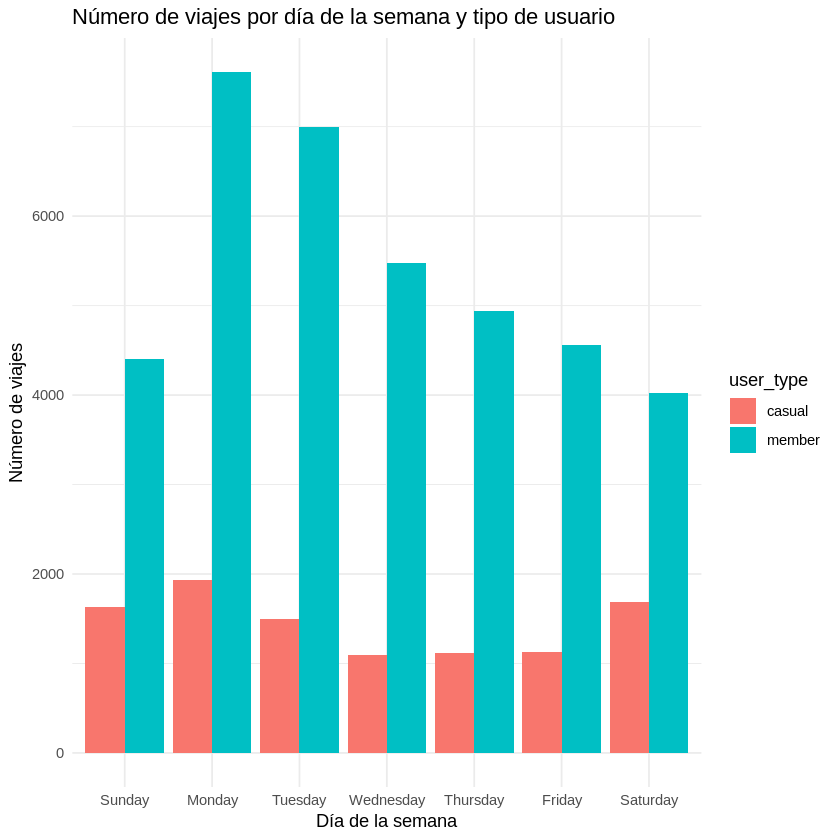

In [74]:
df_cyclist %>%
  group_by(day_of_week, user_type) %>%  # Agrupar por día de la semana y tipo de usuario
  summarise(total_trips = n()) %>%  # Contar el número de viajes (trip_id)
  ggplot(aes(x = day_of_week, y = total_trips, fill = user_type)) +
  geom_bar(stat = "identity", position = "dodge") +  # position = "dodge" para barras separadas por tipo de usuario
  theme_minimal() +
  labs(title = "Número de viajes por día de la semana y tipo de usuario",
       x = "Día de la semana", y = "Número de viajes")# +
  #scale_fill_manual(values = c("casual" = "lightblue", "anualz" = "green"))


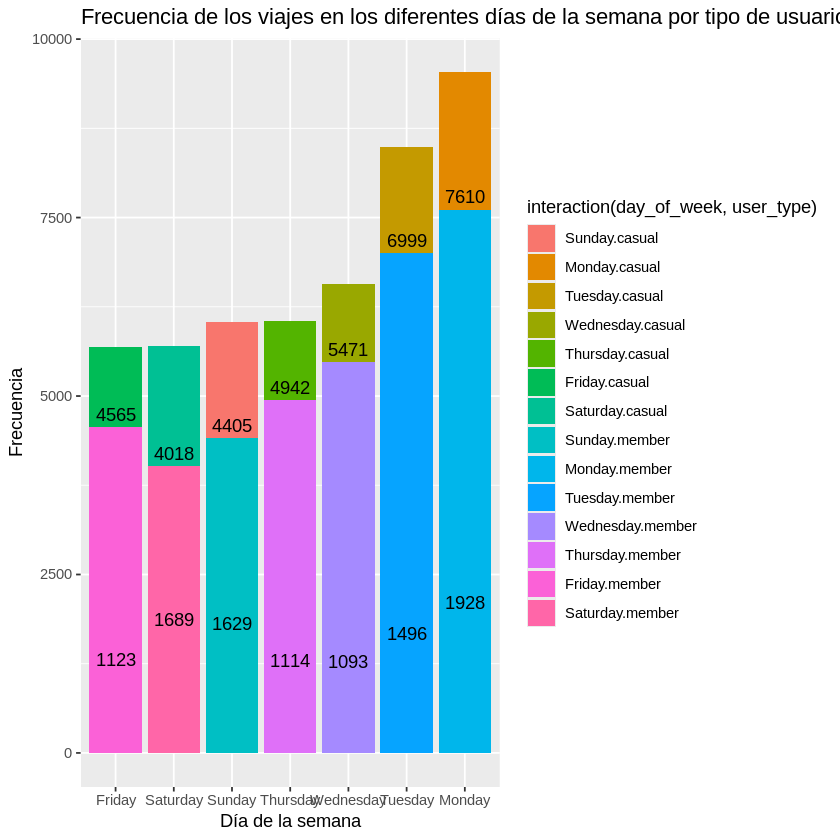

In [79]:
ggplot(df_cyclist, aes(x = reorder(day_of_week, day_of_week, FUN = length), fill = interaction(day_of_week, user_type))) +  # Agrupación por día y tipo de usuario
  geom_bar() +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +  # Agregar etiquetas con frecuencias
  labs(title = "Frecuencia de los viajes en los diferentes días de la semana por tipo de usuario",
       x = "Día de la semana", y = "Frecuencia") +
  theme()# +
  #scale_fill_manual(values = c("lightblue", "lightgreen", "lightcoral", "lightyellow"))  # Personalizar colores para las combinaciones


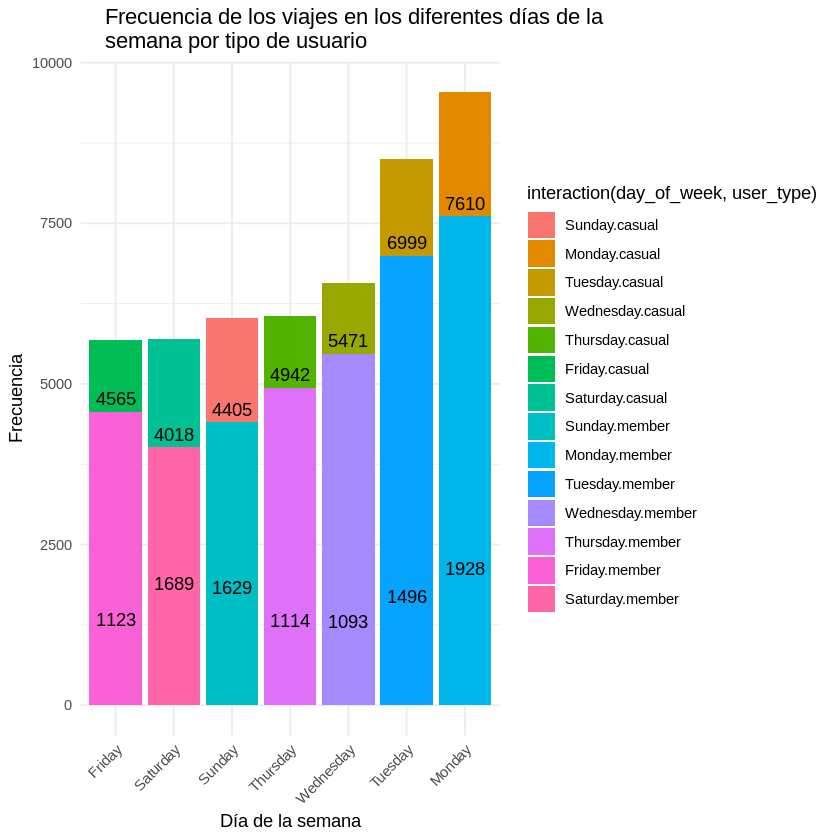

In [90]:
ggplot(df_cyclist, aes(x = reorder(day_of_week, day_of_week, FUN = length), fill = interaction(day_of_week, user_type))) +
  geom_bar() +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
  labs(title = "    Frecuencia de los viajes en los diferentes días de la \n    semana por tipo de usuario",
       x = "Día de la semana", y = "Frecuencia") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) #+
 # scale_fill_brewer(palette = "Paired")  # Usar la paleta "Paired" que tiene más colores


`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


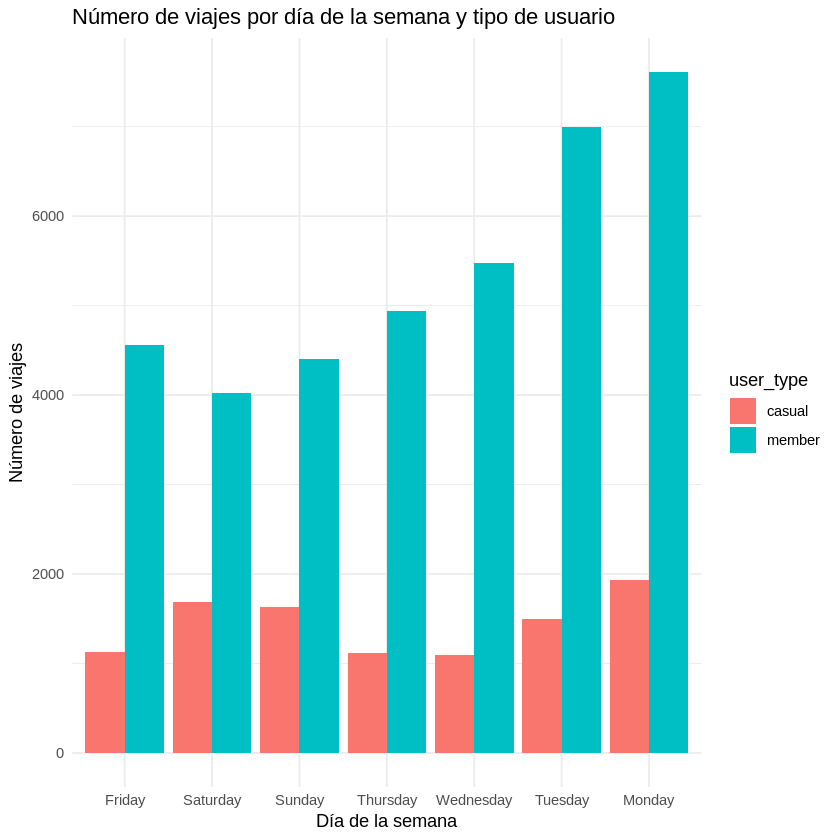

In [91]:
df_cyclist %>%
  group_by(day_of_week, user_type) %>%  # Agrupar por día de la semana y tipo de usuario
  summarise(total_trips = n()) %>%  # Contar el número de viajes (trip_id)
  mutate(day_of_week = factor(day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))) %>%  # Ordenar los días de la semana
  arrange(desc(total_trips)) %>%  # Ordenar por total_trips de mayor a menor
  ggplot(aes(x = reorder(day_of_week, total_trips), y = total_trips, fill = user_type)) +  # Reordenar en función de total_trips
  geom_bar(stat = "identity", position = "dodge") +  # position = "dodge" para barras separadas por tipo de usuario
  theme_minimal() +
  labs(title = "Número de viajes por día de la semana y tipo de usuario",
       x = "Día de la semana", y = "Número de viajes")


`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


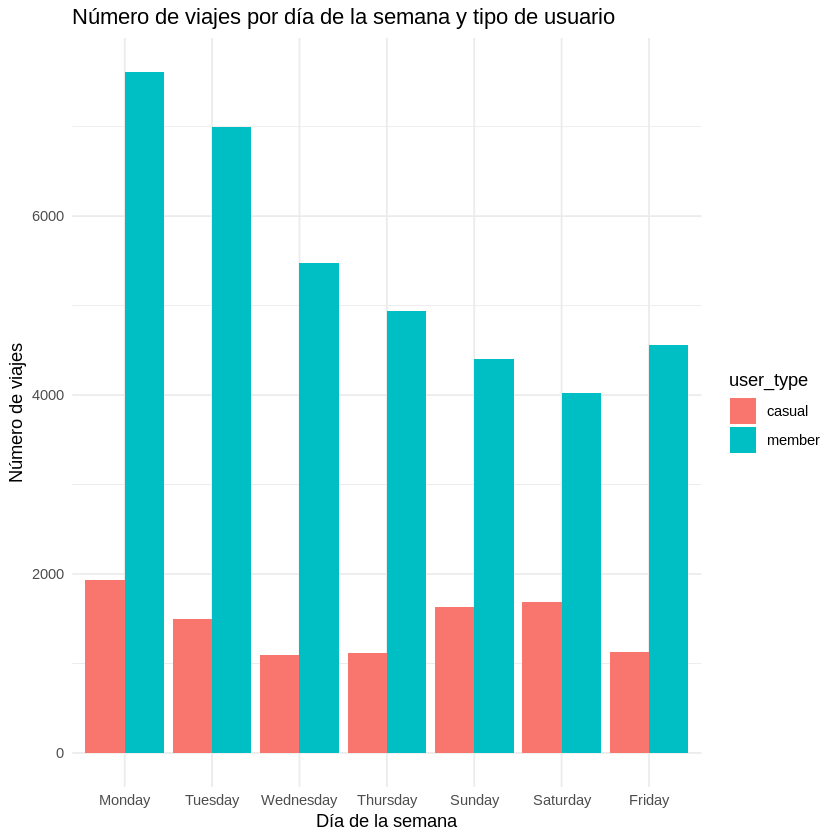

In [92]:
df_cyclist %>%
  group_by(day_of_week, user_type) %>%  # Agrupar por día de la semana y tipo de usuario
  summarise(total_trips = n()) %>%  # Contar el número de viajes (trip_id)
  ggplot(aes(x = reorder(day_of_week, -total_trips), y = total_trips, fill = user_type)) +  # Reordenar según total_trips (de mayor a menor)
  geom_bar(stat = "identity", position = "dodge") +  # position = "dodge" para barras separadas por tipo de usuario
  theme_minimal() +
  labs(title = "Número de viajes por día de la semana y tipo de usuario",
       x = "Día de la semana", y = "Número de viajes")
